In [1]:
'''
2048 GAME PROJECT: Analysis of the bot efficiency and accuracy.

Date created:
    06/2022

Author:
    Filip J. Cierkosz
'''

# Analyze the accuracy of the obtaining the goal state.
# Analyze the runtime for winning ones.
# Find the fastest time to win the game.
# Find the slowest time to win the game.
# ...anything else to be added.
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Create the dataframe for the database records.
db = sqlite3.connect('../db/bot_records.db')
df = pd.read_sql_query("SELECT * FROM bot_records", db)

In [3]:
# Calculate the probability of winning a game.
df_win = df[df['win']==1]
df_loss = df[df['win']==0]
win_prob = len(df_win)/len(df)
print(f'All runs (samples) of the bot : {len(df)}')
print(f'Bot wins : {len(df_win)}')
print(f'Bot wins : {len(df_loss)}')
print(f'Probability of a bot win : {win_prob}')

All runs (samples) of the bot : 500
Bot wins : 150
Bot wins : 350
Probability of a bot win : 0.3


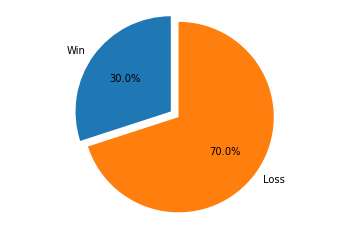

In [4]:
# Pie chart for win-loss relation.
labels = 'Win', 'Loss'
results = [len(df_win), len(df_loss)]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(results, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

In [13]:
# Runtime analysis in seconds (for reference: the tests were run on Apple M1).
avg_time_l = df_loss['time_played_sec'].mean()
avg_time_w = df_win['time_played_sec'].mean()
max_time_w = df_win['time_played_sec'].max()
min_time_w = df_win['time_played_sec'].min()
print(f'Average time to lose (sec) : {avg_time_l:.2f}')
print(f'Average time to win (sec) : {avg_time_w:.2f}')
print(f'Max time to win (sec) : {max_time_w:.2f}')
print(f'Min time to win (sec) : {min_time_w:.2f}')

Average time to lose (sec) : 58.40
Average time to win (sec) : 68.44
Max time to win (sec) : 74.45
Min time to win (sec) : 64.59


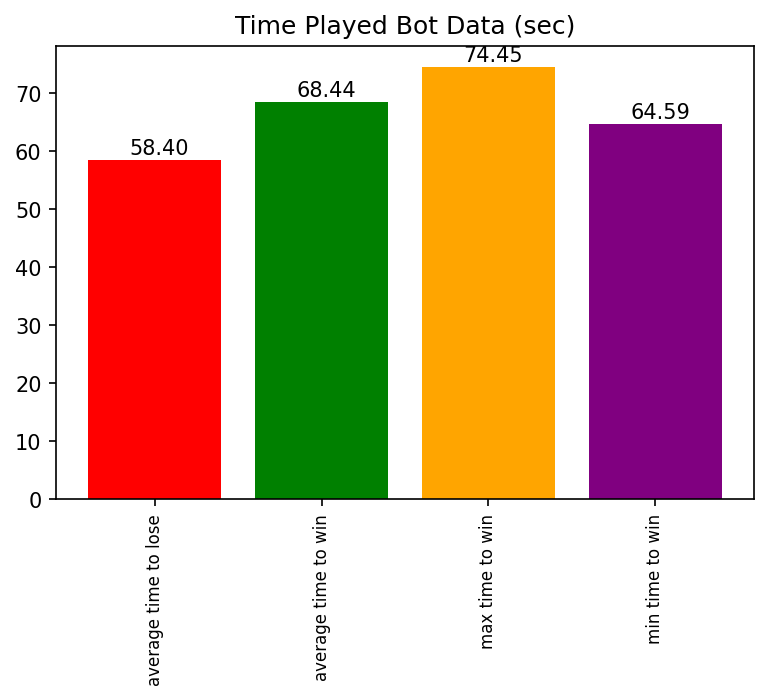

In [34]:
# Bar charts for the recorded times played.
plt.figure(dpi=150)
plt.title('Time Played Bot Data (sec)')
plt.xticks(rotation=90, fontsize=8)
labels = ['average time to lose', 'average time to win', 'max time to win', 'min time to win']
res_times = [avg_time_l, avg_time_w, max_time_w, min_time_w]
plt.bar(labels, res_times, color=['red', 'green', 'orange', 'purple'])

# Add labels at the top of each bar.
for i in range(len(labels)):
        plt.text(i-0.15, res_times[i]+1, f'{res_times[i]:.2f}')

In [44]:
# Create dictionary for scores, i.e. {score:counter}.
all_scores_arr = np.array(df['score'])
score, counter = np.unique(all_scores_arr, return_counts=True)
scores_counted_dict = dict(zip(score, counter))
scores_counted_dict

{256: 3, 512: 57, 1024: 290, 2048: 150}

In [8]:
# Bar chart for the scores.
plt.figure(dpi=150)
plt.title('Time Played Bot Data (sec)')
plt.xticks(rotation=90, fontsize=8)
labels = ['average time to lose', 'average time to win', 'max time to win', 'min time to win']
res_times = [avg_time_l, avg_time_w, max_time_w, min_time_w]
plt.bar(labels, res_times, color=['red', 'green', 'orange', 'purple'])

61.41298767614364